Instalation

In [1]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2090, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 2090 (delta 43), reused 79 (delta 34), pack-reused 1986
Receiving objects: 100% (2090/2090), 232.91 MiB | 499.00 KiB/s, done.
Resolving deltas: 100% (1230/1230), done.


In [3]:

!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     |████████████████████████████████| 8.4 MB 44 kB/s eta 0:00:012
     |████████████████████████████████| 6.9 MB 112 kB/s eta 0:00:01
     |████████████████████████████████| 361 kB 87 kB/s eta 0:00:01
     |████████████████████████████████| 59.9 MB 66 kB/s eta 0:00:013
  Attempting uninstall: lxml
    Found existing installation: lxml 4.6.1
    Uninstalling lxml-4.6.1:
      Successfully uninstalled lxml-4.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

spyder 4.1.5 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
spyder 4.1.5 requires pyqt5<5.13; python_version >= "3", but you'll have pyqt5 5.15.7 which is incompatible.


Caputre pictures to train a model

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid   # Unique identifier
import os
import time

Collecting Images

In [3]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [15]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

Train model

In [4]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-383-g3d47fc6 Python-3.8.5 torch-1.12.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    31/499     1.09G   0.06034   0.01332   0.02672         3       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.167      0.907      0.281      0.123

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    32/499     1.09G   0.06257   0.01343   0.02489         4       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.167      0.907      0.281      0.123

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    33/499     1.09G   0.06888   0.01379   0.02707         7       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.542      0.645      0.599      0.155

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
    82/499     1.09G   0.04299   0.00965   0.02452         5       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.667      0.906      0.936      0.521

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    83/499     1.09G   0.04437   0.01269   0.01505        11       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.768      0.938       0.91      0.428

     Epoch   gpu_mem       box       obj       cls    labels  img_size
    84/499     1.09G   0.04247  0.009858   0.01037         6       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.768      0.938       0.91      0.428

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   133/499     1.09G    0.0257   0.00892   0.01036         8       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35       0.99          1      0.995      0.795

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   134/499     1.09G   0.02982  0.007684   0.01157         5       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.768          1      0.973      0.699

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   135/499     1.09G   0.03633   0.01042  0.008962        11       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.787      0.978      0.977      0.714

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   184/499     1.09G   0.02653  0.007651  0.009609         7       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.849      0.991       0.99      0.792

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   185/499     1.09G   0.02855  0.008441   0.01144         7       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.997          1      0.995       0.77

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   186/499     1.09G   0.02668  0.007256   0.01085         6       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.992          1      0.995      0.788

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   235/499     1.09G   0.02698  0.007343  0.005504         5       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.995          1      0.995       0.76

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   236/499     1.09G   0.02379  0.007625  0.005547         9       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.995          1      0.995       0.76

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   237/499     1.09G    0.0216  0.008336   0.00764         9       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.995          1      0.995      0.793

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   286/499     1.09G   0.01877  0.006793  0.006027         6       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.993      0.998      0.995       0.84

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   287/499     1.09G   0.02134  0.006367  0.005932         5       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.994          1      0.995      0.815

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   288/499     1.09G   0.01752  0.006242  0.003853         7       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.994          1      0.995      0.815

     Epoch   gpu_mem       box      


     Epoch   gpu_mem       box       obj       cls    labels  img_size
   337/499     1.09G   0.01782  0.006644  0.003906         7       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.996          1      0.995      0.904

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   338/499     1.09G   0.01695    0.0066  0.003857         6       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.996          1      0.995      0.866

     Epoch   gpu_mem       box       obj       cls    labels  img_size
   339/499     1.09G   0.02101  0.006991  0.004932         7       320: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         35         35      0.996          1      0.995       0.85

     Epoch   gpu_mem       box      

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/achraf/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-8-17 Python-3.8.5 torch-1.12.1+cu102 CUDA:0 (NVIDIA GeForce GTX 1650, 3914MiB)

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


Save model

In [6]:
torch.save(model, "models/drowsyness.pt")

Load model

In [3]:
drowsyness = torch.load("models/drowsyness.pt")
drowsyness.eval()

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

Test Video

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = drowsyness(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

Test Picture

image 1/1: 480x640 1 awake
Speed: 10.1ms pre-process, 15.1ms inference, 1.4ms NMS per image at shape (1, 3, 480, 640)


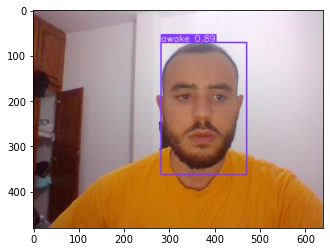

In [13]:
img =os.path.join('data/images/awake.ecb1982a-1a54-11ed-ae63-d5cefd608ed0.jpg')
result=drowsyness(img)
result.print()
%matplotlib inline 
plt.imshow(np.squeeze(result.render()))
plt.show()